In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
dataset = pd.read_csv('chipotle.tsv',sep='\t')

In [208]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [210]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


## Examples of BoxPlots!

Here we are analyzing the distribution of age per gender

Text(0.5, 0.98, '')

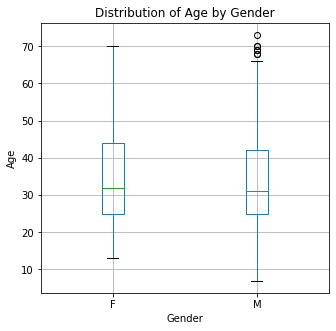

In [211]:
users.boxplot(by='gender', column=['age'],figsize=(5,5))
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Distribution of Age by Gender")
plt.suptitle("")

#### Only beautifying

Text(0.5, 0.98, '')

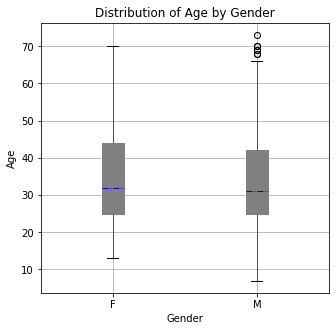

In [214]:
#If you want, you can set some colors.
properties = dict(boxes="Gray", whiskers="Red", medians="Blue", caps="Black")
medianprops = dict(linestyle='-.', linewidth=1)

users.boxplot(by='gender', column=['age'], patch_artist=True, color=properties, medianprops=medianprops, figsize=(5,5))

plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Distribution of Age by Gender")
plt.suptitle("")

#### Same thing using Seaborn library

Text(0.5, 0.98, '')

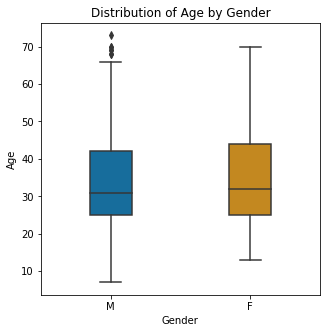

In [215]:
plt.figure(figsize=(5,5))
boxplot = sns.boxplot(y="age", x="gender", 
                 data=users, 
                 palette="colorblind", width=0.3)
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Distribution of Age by Gender")
plt.suptitle("")



### Now: Boxplot for M x F, only for those people older than 40

Text(0.5, 0.98, '')

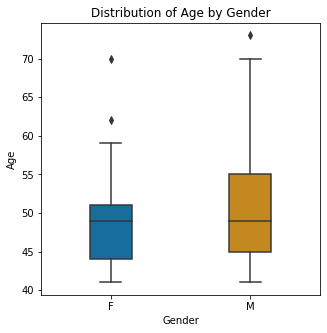

In [216]:
plt.figure(figsize=(5,5))
boxplot = sns.boxplot(y="age", x="gender", 
                 data=users[users["age"]>40], 
                 palette="colorblind", width=0.3)
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Distribution of Age by Gender")
plt.suptitle("")



#### Boxplots again
**Here we are analyzing the distribution of age per Occupation**

Text(0.5, 0.98, '')

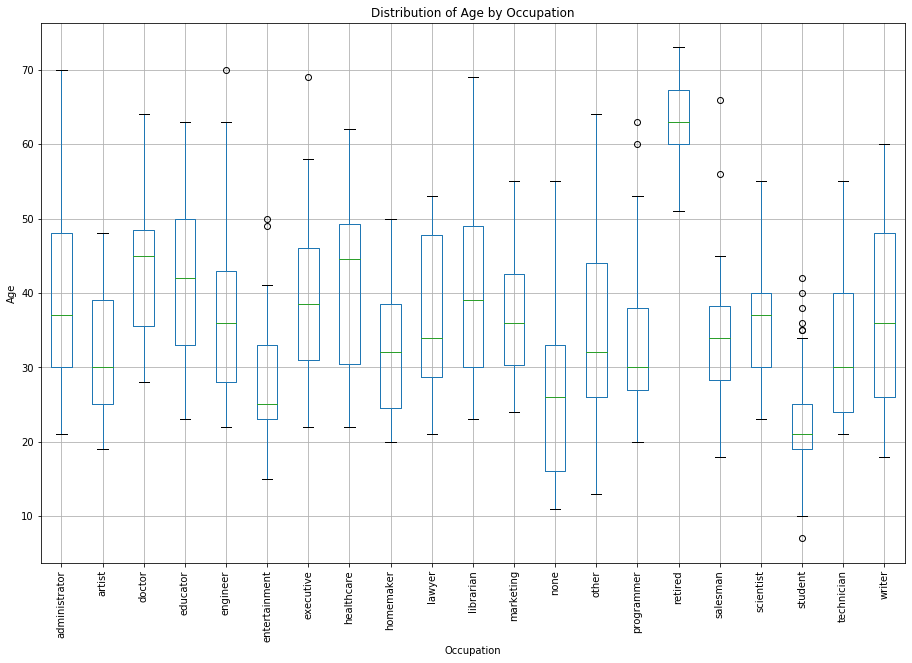

In [220]:
users.boxplot(by='occupation', column=['age'],figsize=(15,10))

plt.xlabel("Occupation")
plt.xticks(rotation = 90)
plt.ylabel("Age")
plt.title("Distribution of Age by Occupation")
plt.suptitle("")

Text(0.5, 0.98, '')

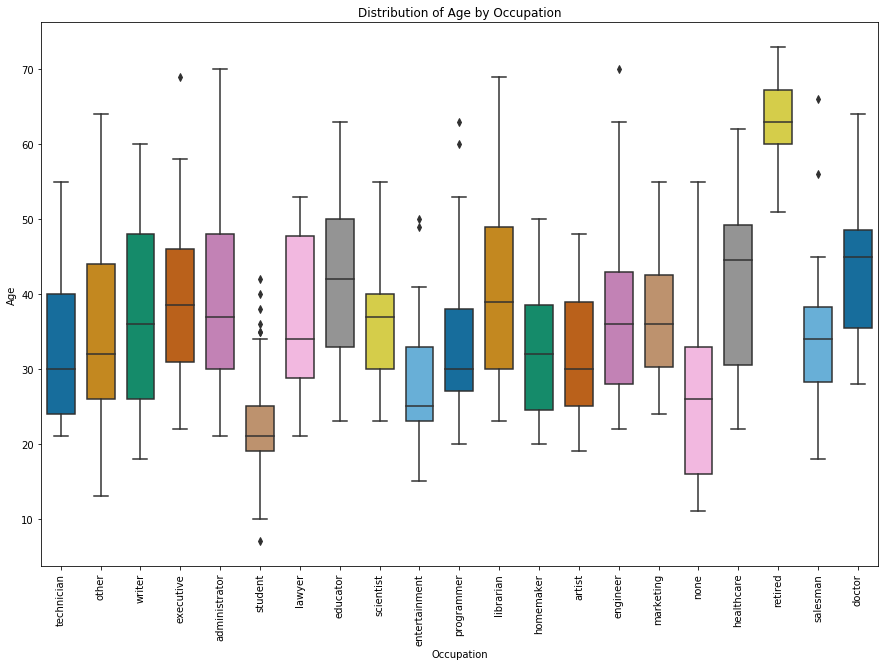

In [221]:
plt.figure(figsize=(15,10))
boxplot = sns.boxplot(y="age", x="occupation", 
                 data=users, 
                 palette="colorblind", width=0.7)
plt.xlabel("Occupation")
plt.xticks(rotation = 90)
plt.ylabel("Age")
plt.title("Distribution of Age by Occupation")
plt.suptitle("")

### Scatterplot
Checking the relationship between price and quantity of items ordered
*Not grouped by order*

Text(0.5, 1.0, 'Number of items ordered per item price')

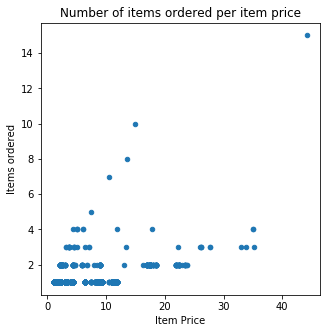

In [328]:
chipo.plot.scatter(x="item_price",y="quantity", figsize=(5,5))

plt.xlabel("Item Price")
plt.ylabel("Items ordered")
plt.title("Number of items ordered per item price")

**Once again, same thing using Seaborn**

<Figure size 360x360 with 0 Axes>

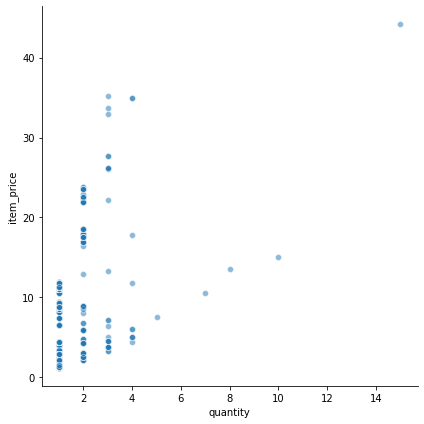

In [329]:
plt.figure(figsize=(5,5))
sns.relplot(x="quantity", y="item_price",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=chipo)

### Lineplots
First, just creating something to mimic a timeline. Instead, we are using the order id to show the temporal behavior of items ordered.
We group by order, and, then, we sum the quantity.

In [233]:
#just for sake of readability I am getting the last 40 orders
#grouping by order id, leaving order_id as a regular column (not an index)
#and aggregating the quantity of items, summing them. Lastly, sorting by order_id
chipo_subset = chipo.tail(40)[:].groupby("order_id", as_index=False).agg({"quantity":"sum"}).sort_values("order_id")

Text(0.5, 1.0, 'Number of items ordered per order')

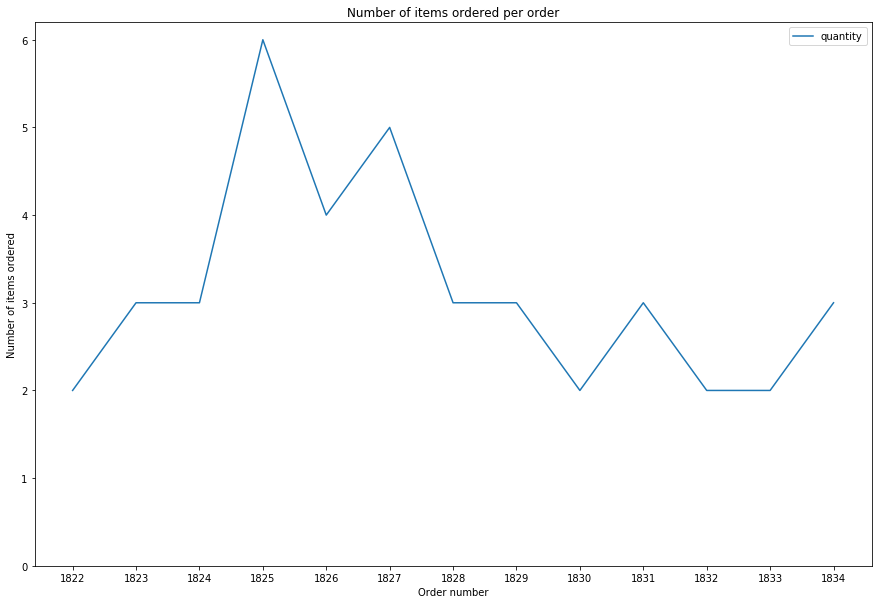

In [235]:
#Creating the plot, adjusting the sizing
chipo_subset.plot.line(x="order_id", y="quantity", figsize=(15,10))
#beautification
plt.xlabel("Order number")
plt.ylabel("Number of items ordered")

#Working with the ticks. I want the ticks' steps to be "1", all the items appearing; and set the minimum and maximum
#i do this by settin the range of xticks and yticks: (range(start value, end value, step))
plt.xticks(range(chipo_subset['order_id'].min(), chipo_subset['order_id'].max()+1, 1)) 
plt.yticks(range(0, chipo_subset['quantity'].max()+1, 1)) 

plt.title("Number of items ordered per order")

**Seaborn gives us the same graphic**

Text(0.5, 1.0, 'Number of items ordered per order')

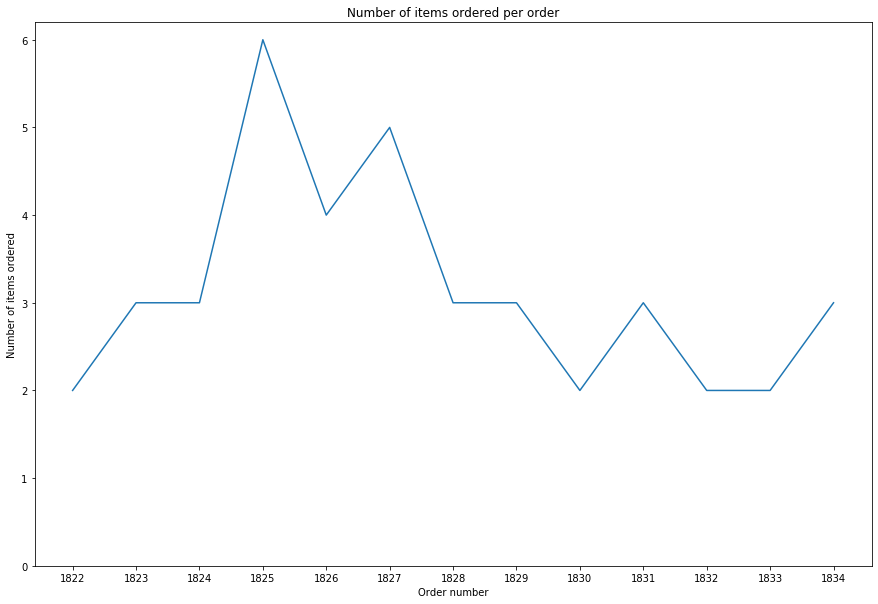

In [330]:
plt.figure(figsize=(15,10))
sns.lineplot(data=chipo_subset, x="order_id", y="quantity")
plt.xlabel("Order number")
plt.ylabel("Number of items ordered")
plt.xticks(range(chipo_subset['order_id'].min(), chipo_subset['order_id'].max()+1, 1)) 
plt.yticks(range(0, chipo_subset['quantity'].max()+1, 1)) 

plt.title("Number of items ordered per order")

Working with another dataset, showing how to create basic line plots

Text(0, 0.5, '#')

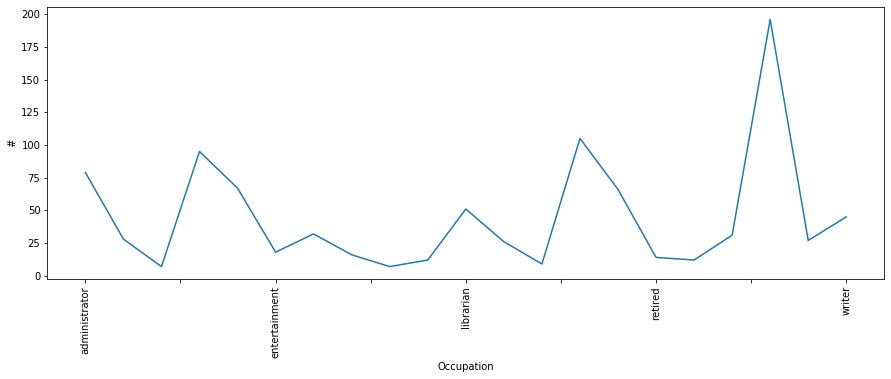

In [304]:
users_subset = users.groupby("occupation", as_index=False)
users_subset.size().plot.line(figsize=(15,5))
plt.xlabel("Occupation")
plt.xticks(rotation = 90)
plt.ylabel("#")

#### Comparing occupation per gender

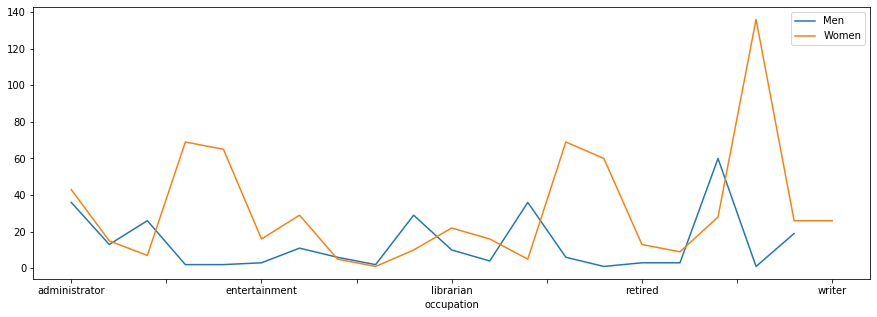

In [318]:
users_subset_men = users[users["gender"]=="M"].groupby("occupation", as_index=False)
users_subset_women = users[users["gender"]=="F"].groupby("occupation", as_index=False)
users_subset_women.size().plot.line(figsize=(15,5))
users_subset_men.size().plot.line(figsize=(15,5)).legend(["Men", "Women"])


### Bar plot
Finally, creating a bar plot show the number of rows that each item appears.

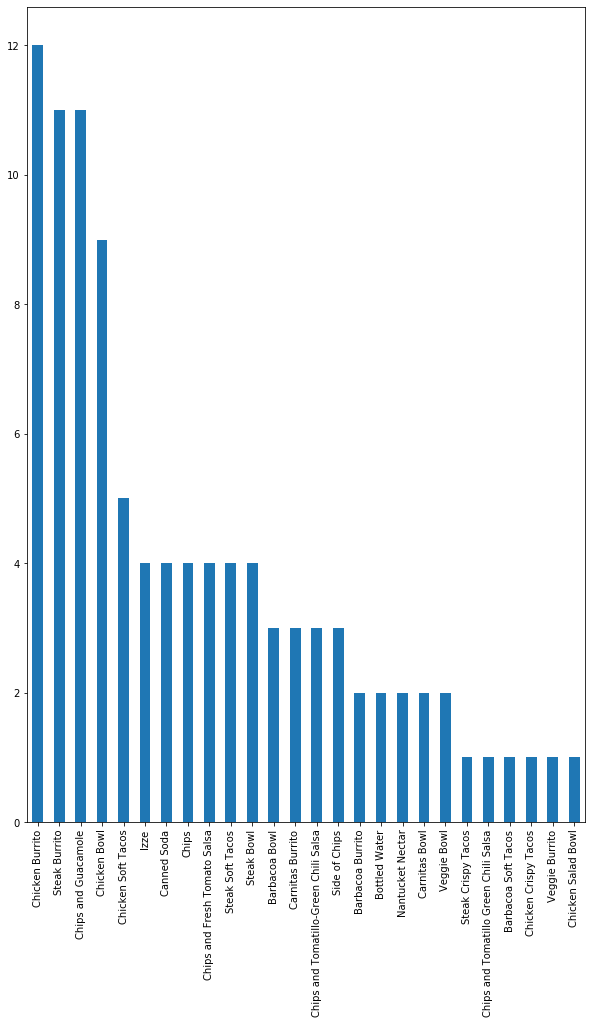

In [333]:
chipo.head(100)['item_name'].value_counts().plot.bar()

And playing with a different dataset as well...

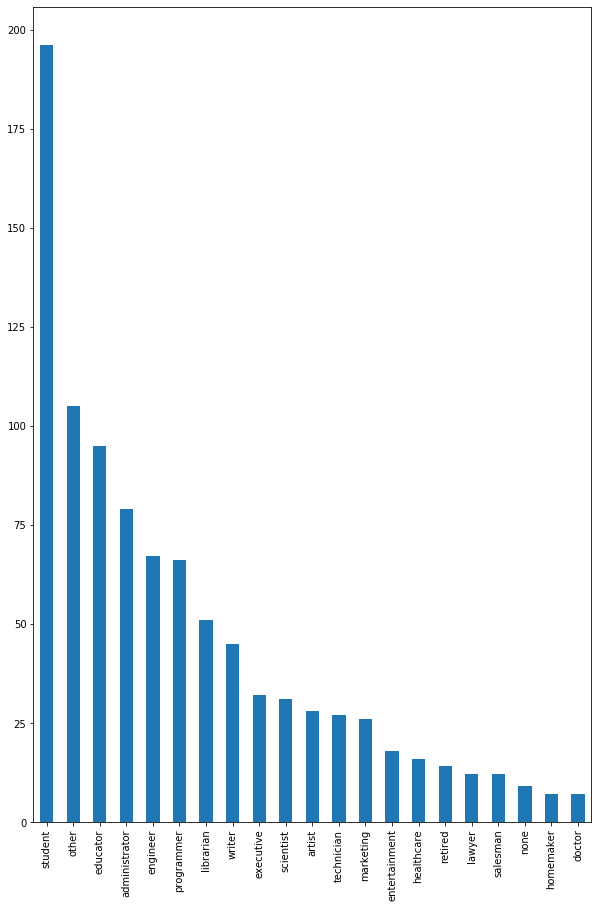

In [335]:
users['occupation'].value_counts().plot.bar()